# Preamble

In [7]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])

import os 
import h5py
import copy
import numpy as np 
import matplotlib.pyplot as plt 
import corner

import sys 
sys.path.append("../postprocessing/")
import utils_compare_runs
import compare_runs

params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

# Improved corner kwargs
default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        truth_color = "red",
                        save=False)

In [2]:
# Paths per event
GW170817_NRTidalv2_paths = {"jim": "/home/thibeau.wouters/TurboPE-BNS/real_events_no_taper/GW170817_NRTidalv2/backup/results_production.npz",
                            "pBilby": utils_compare_runs.bilby_root_path + "GW170817_IMRPhenomD_NRTidalv2_result.json",
                            "RB": "../RB/gw170817_relbin_result.hdf5",
                            "ROQ": "../ROQ/gw170817_ROQ_result.hdf5"}

# Gather all paths under 1 id
paths_dict = {}
paths_dict["GW170817_NRTidalv2"] = GW170817_NRTidalv2_paths

In [3]:
def get_chains_hdf5(path):
    with h5py.File(path, "r") as f:
        posterior = f["posterior"] 
        samples = np.array([posterior[name][()] for name in utils_compare_runs.bilby_names]).T
    return samples

jim
pBilby
RB
<class 'h5py._hl.group.Group'>
<KeysViewHDF5 ['L1_matched_filter_snr', 'L1_optimal_snr', 'V1_matched_filter_snr', 'V1_optimal_snr', 'a_1', 'a_2', 'chi_1', 'chi_1_in_plane', 'chi_2', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_theta_jn', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'fiducial', 'geocent_time', 'iota', 'lambda_1', 'lambda_2', 'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'maximum_frequency', 'minimum_frequency', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'pn_amplitude_order', 'pn_phase_order', 'pn_spin_order', 'pn_tidal_order', 'psi', 'ra', 'redshift', 'reference_frequency', 'spin_1x', 'spin_1y', 'spin_1z', 'spin_2x', 'spin_2y', 'spin_2z', 'symmetric_mass_ratio', 'theta_jn', 'tilt_1', 'tilt_2', 'total_mass', 'total_mass_source']>
(5172, 12)
ROQ
<class 'h5py._hl.group.Group'>
<KeysViewHDF5 ['H1_log_likelihood', 'H1_matched_filter_snr', 

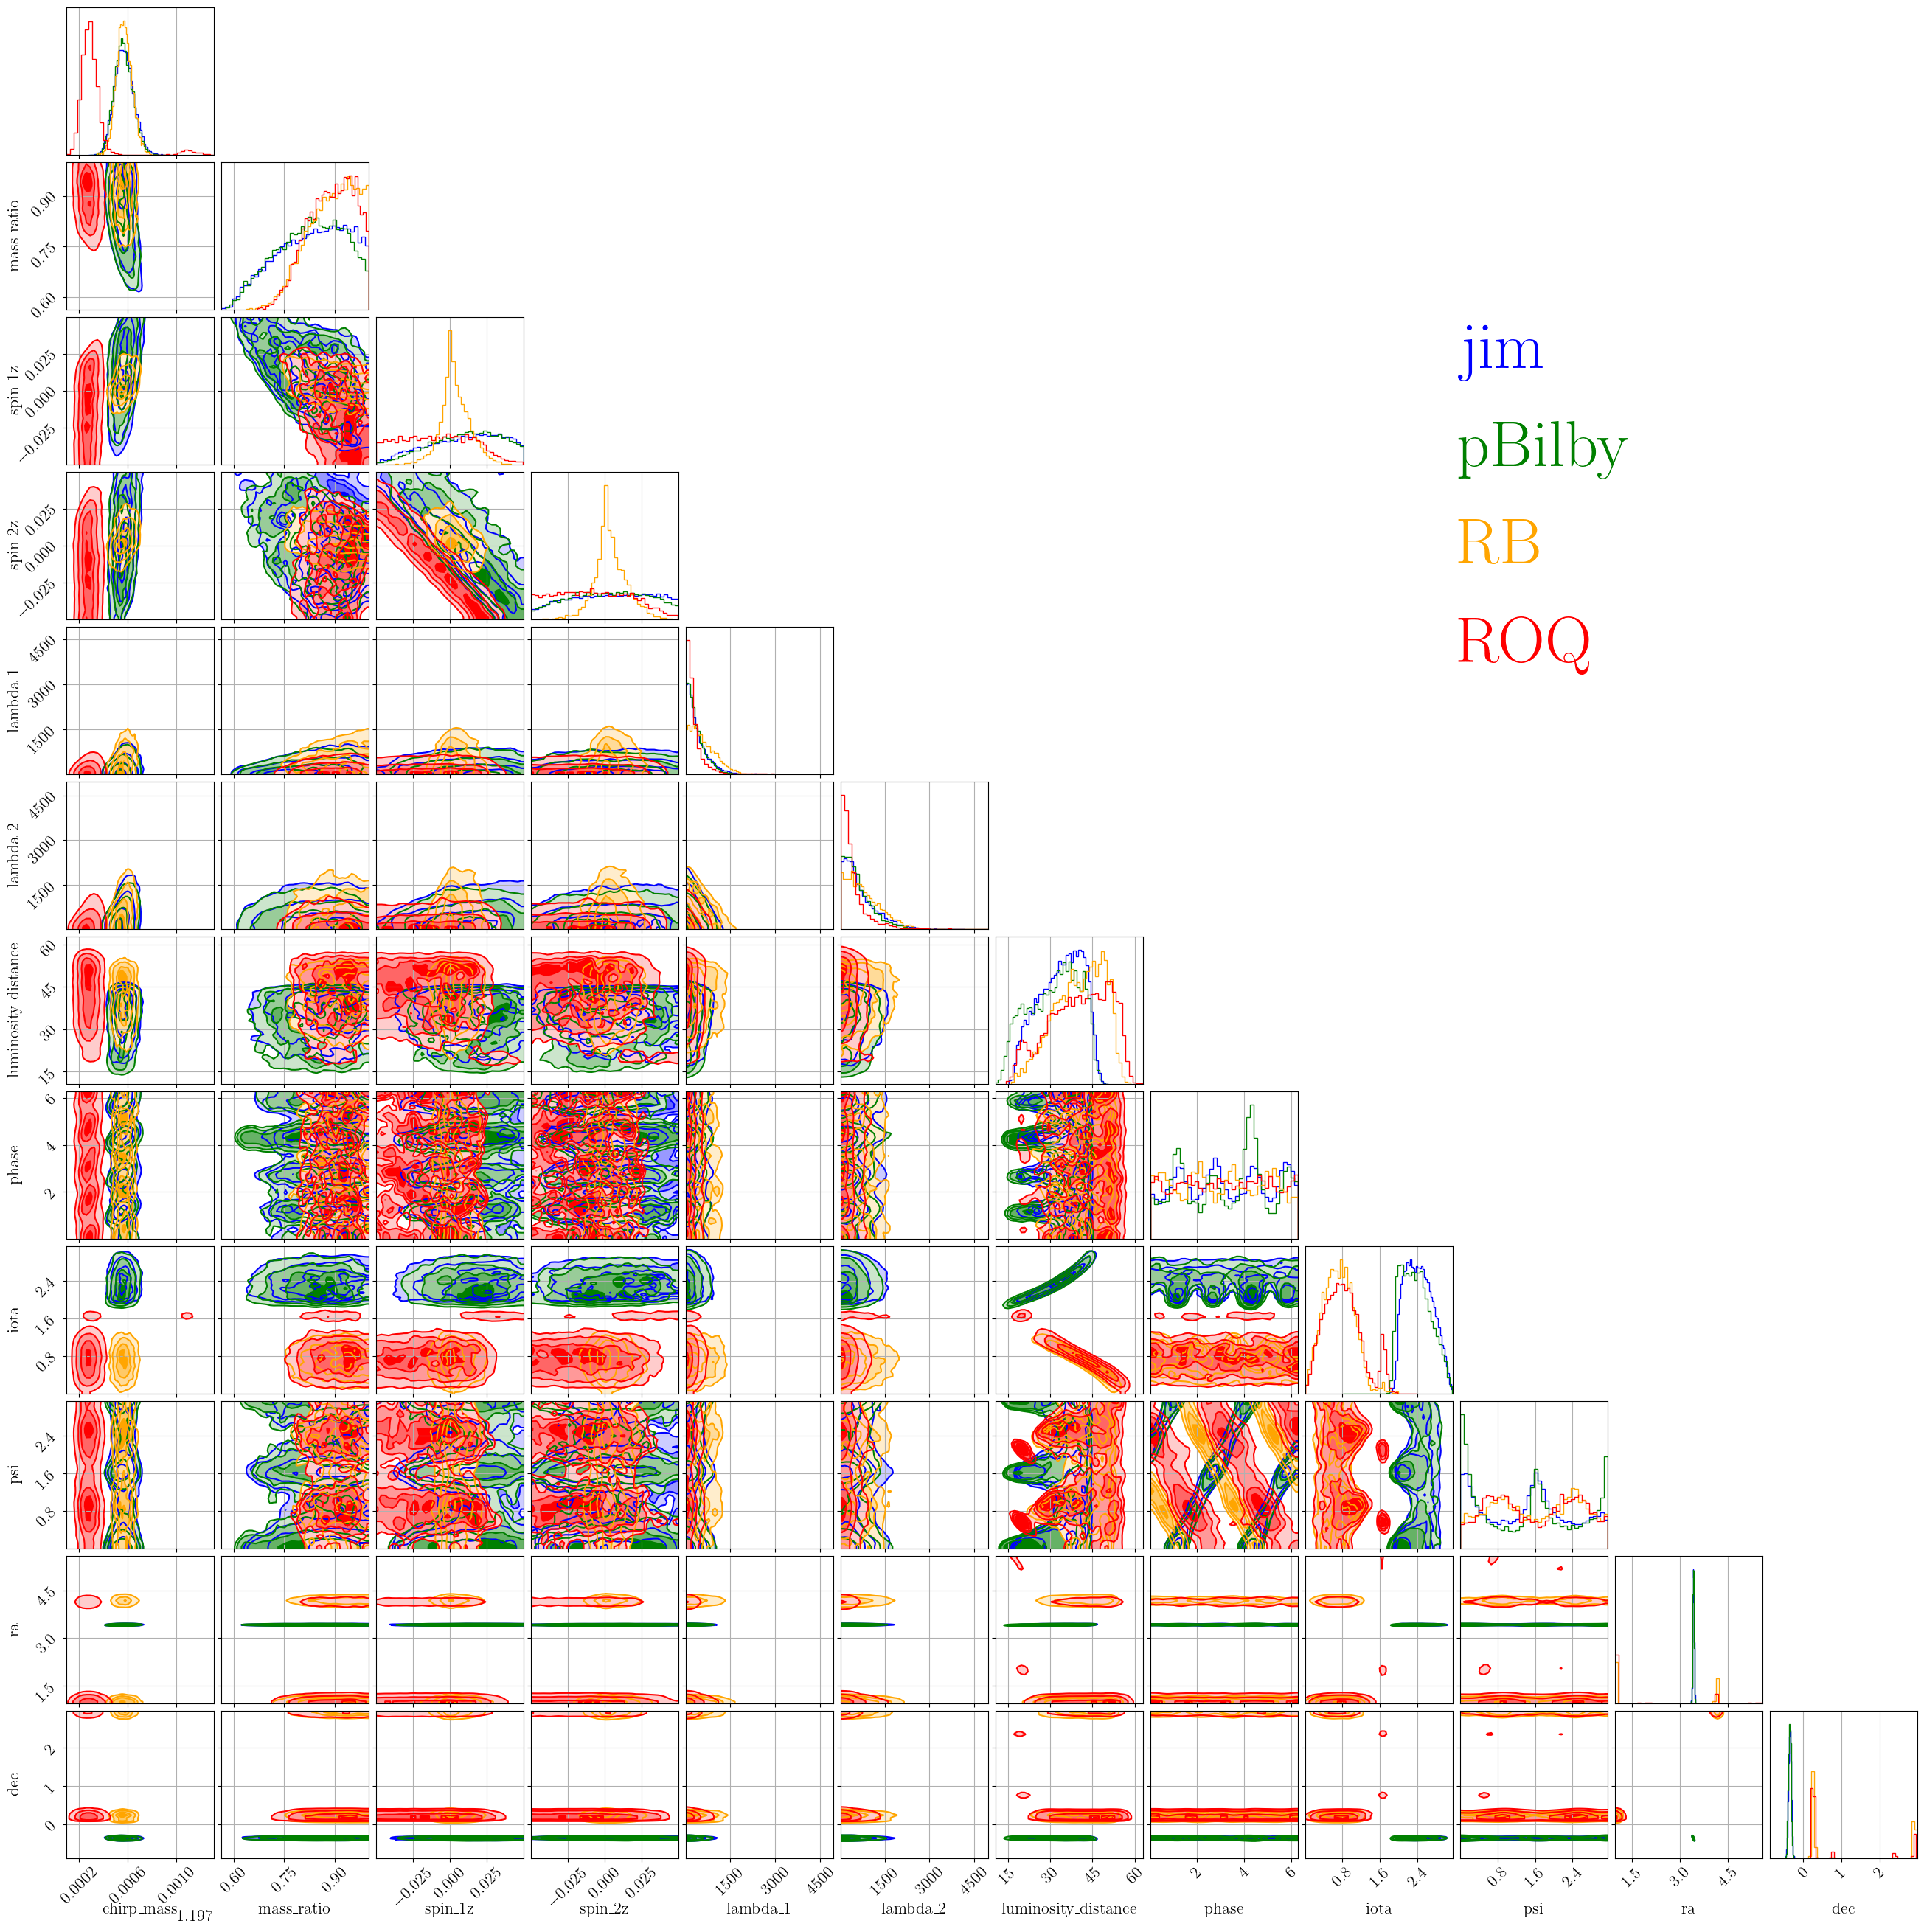

In [13]:
COLORS = ["blue", "green", "orange", "red"]
default_hist_kwargs = {"density": True}

# For text:
x = 0.75
y_start = 0.8 
delta_y = 0.05
fs = 64

for event in paths_dict.keys():
    for i, (key, path) in enumerate(paths_dict[event].items()):
        print(key)
        if key == "jim":
            chains = utils_compare_runs.get_chains_jim(path)
        elif key in ["RB", "ROQ"]:
            chains = get_chains_hdf5(path)
        else:
            chains = utils_compare_runs.get_chains_bilby(path)
            
        # Get corner kwargs
        corner_kwargs = copy.deepcopy(default_corner_kwargs)
        hist_kwargs = copy.deepcopy(default_hist_kwargs)
            
        color = COLORS[i]
        corner_kwargs["color"] = color
        hist_kwargs["color"] = color
        corner_kwargs["hist_kwargs"] = hist_kwargs
            
        if i == 0:
            fig = corner.corner(chains, labels = utils_compare_runs.bilby_names, **corner_kwargs)
        else:
            corner.corner(chains, fig=fig, **corner_kwargs)
            
        plt.text(x, y_start - i * delta_y, key, color=color, transform=plt.gcf().transFigure, fontsize=fs)